# 1. 데이터 불러오기

Data reference : https://www.kaggle.com/datasets/daniboy370/boston-marathon-2019?resource=download

In [12]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./Dataset-Boston-2019.csv')

In [5]:
print(df.shape)
df.head(10)

(26651, 8)


,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
0,1,30,M,Kenya,2:07:57,7677,1,KEN
1,2,29,M,Ethiopia,2:07:59,7679,2,ETH
2,3,34,M,Kenya,2:08:07,7687,3,KEN
3,4,32,M,Kenya,2:08:54,7734,4,KEN
4,5,26,M,Kenya,2:08:55,7735,5,KEN
5,6,28,M,Kenya,2:08:57,7737,6,KEN
6,7,27,M,United States,2:09:09,7749,7,USA
7,8,30,M,United States,2:09:25,7765,8,USA
8,9,24,M,Kenya,2:09:25,7765,9,KEN
9,10,28,M,Kenya,2:09:53,7793,10,KEN


### 데이터 확인

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank_Tot      26651 non-null  int64 
 1   Age           26651 non-null  int64 
 2   Gender        26651 non-null  object
 3   Country       26651 non-null  object
 4   Result_hr     26651 non-null  object
 5   Result_sec    26651 non-null  int64 
 6   Rank_Gender   26651 non-null  int64 
 7   Country_code  26651 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.6+ MB


Result_hr 컬럼이 object로 되어있으니 변환을 해줘야 함

### null 값 확인

In [10]:
df.isnull().mean()

,0
Rank_Tot,0.0
Age,0.0
Gender,0.0
Country,0.0
Result_hr,0.0
Result_sec,0.0
Rank_Gender,0.0
Country_code,0.0


In [ ]:
df.isnull().sum()

,0
Rank_Tot,0
Age,0
Gender,0
Country,0
Result_hr,0
Result_sec,0
Rank_Gender,0
Country_code,0


# 2. Column Chart

참가자의 나이 순서대로 막대차트 그리기

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook

In [14]:
Country = set(df.Country)
Country

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Guatemala',
 'Guyana',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Korea, Republic of',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macao',
 'Malaysia',
 'Malta',
 'Mexico',
 'Moldova',
 'Monaco',
 'Morocco',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Pakistan',
 'P

In [15]:
# 한국인 데이터만 가져오기
KOR_runner = df[df.Country=='Korea, Republic of']
KOR_runner

,Rank_Tot,Age,Gender,Country,Result_hr,Result_sec,Rank_Gender,Country_code
1663,1773,36,M,"Korea, Republic of",2:55:42,10542,1664,USA
1756,1878,43,M,"Korea, Republic of",2:56:19,10579,1757,KOR
1761,1883,45,M,"Korea, Republic of",2:56:21,10581,1762,USA
1790,1915,25,M,"Korea, Republic of",2:56:31,10591,1791,KOR
1832,1957,34,M,"Korea, Republic of",2:56:49,10609,1833,KOR
...,...,...,...,...,...,...,...,...
25990,25486,52,F,"Korea, Republic of",5:26:33,19593,11321,KOR
26103,25685,61,F,"Korea, Republic of",5:31:44,19904,11434,KOR
26386,26200,60,F,"Korea, Republic of",5:48:10,20890,11717,KOR
26461,26328,57,F,"Korea, Republic of",5:52:49,21169,11792,USA


### Column 차트 1

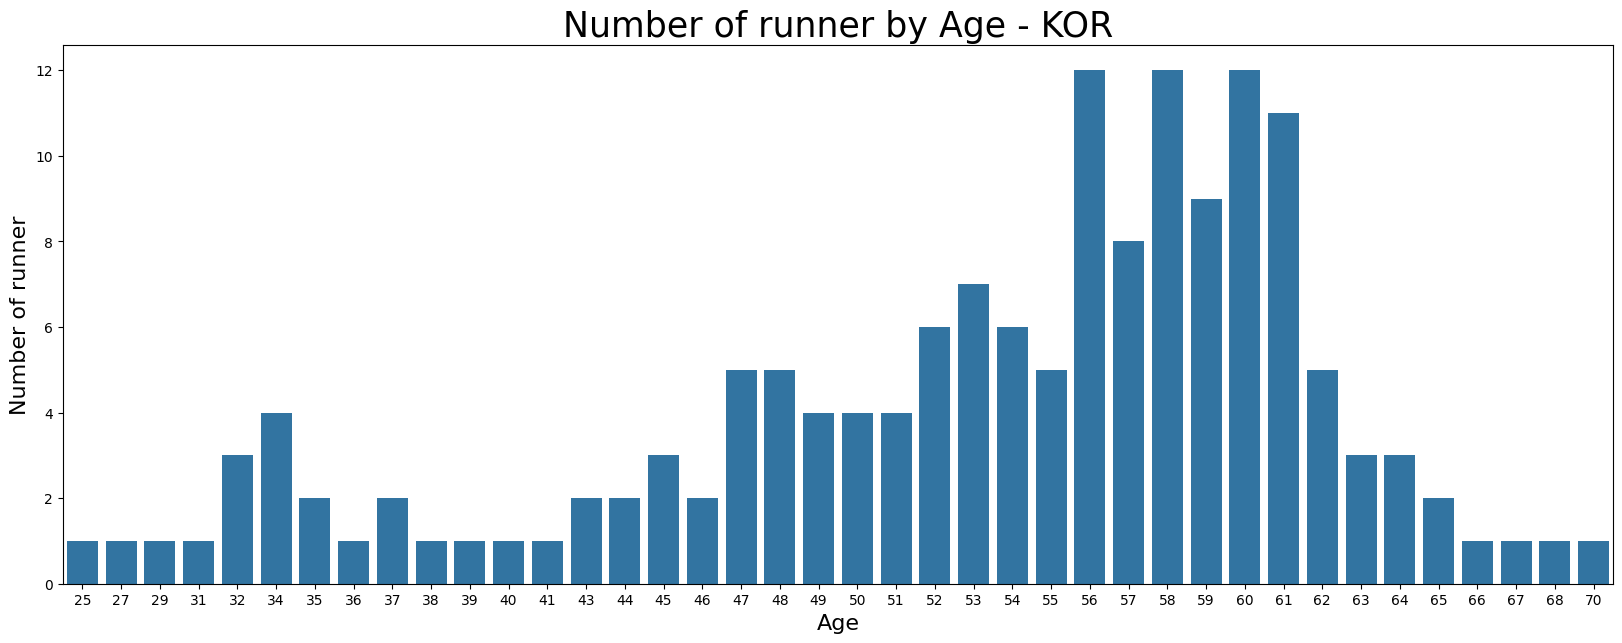

In [21]:
# column 그래프 그리기
plt.figure(figsize=(20,7))
runner_Age = sns.countplot(x='Age', data=KOR_runner)

# column 그래프 부가 설명
runner_Age.set_title('Number of runner by Age - KOR', fontsize=25)
runner_Age.set_xlabel('Age', fontsize = 16)
runner_Age.set_ylabel('Number of runner', fontdict={'size':16})
plt.show()

### Coulmn 차트 2
나이별, 성별별 그래프 그리기

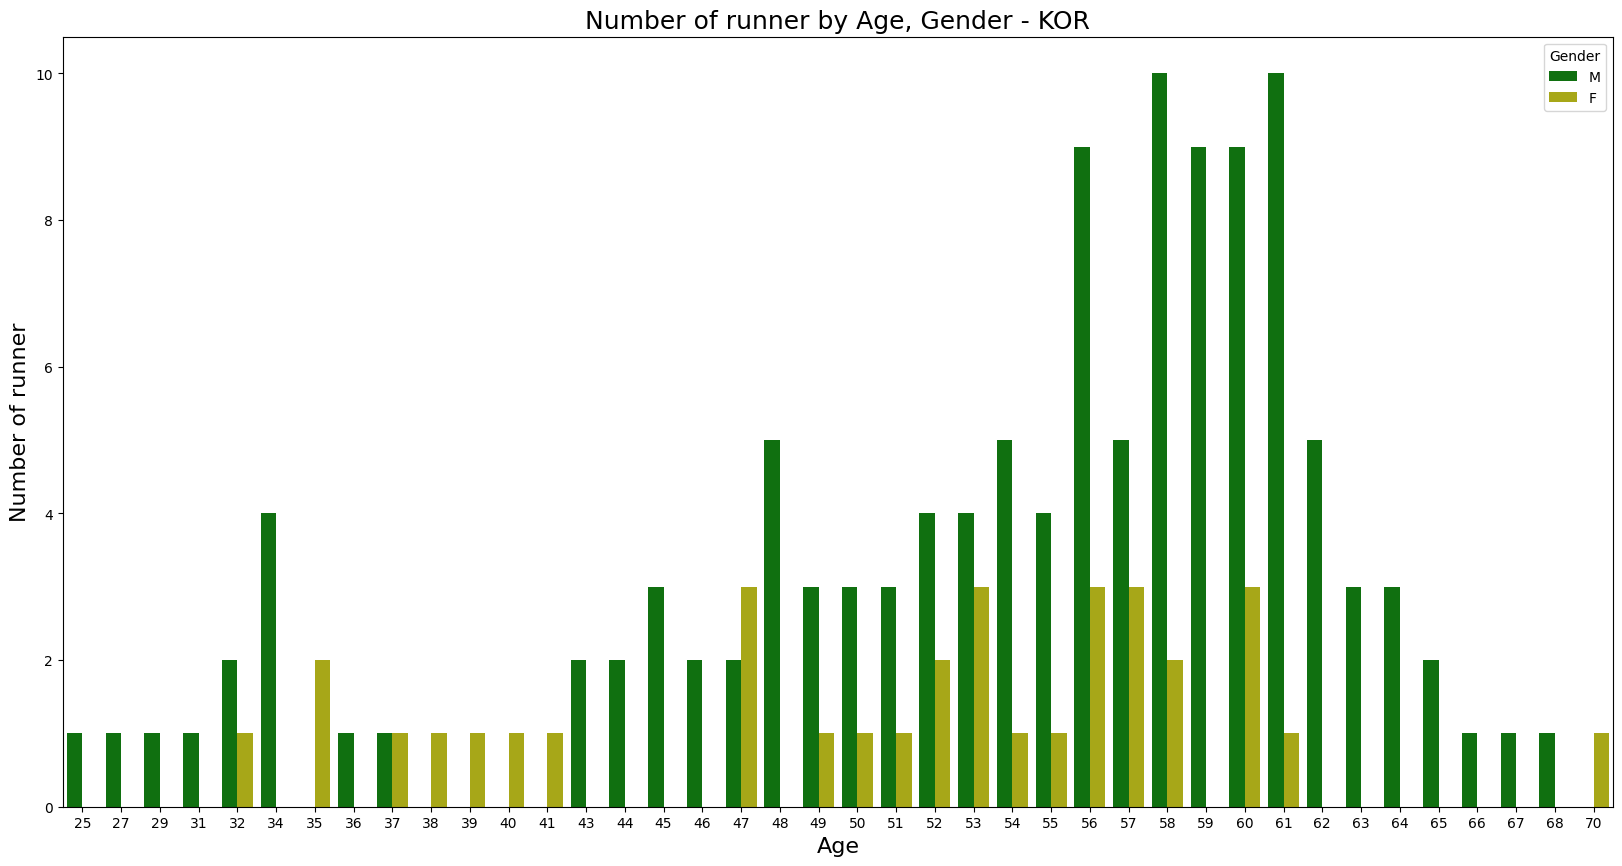

In [31]:
# column 그래프 그리기
plt.figure(figsize=(20,10))
runner_Age=sns.countplot(x='Age', data=KOR_runner, hue='Gender', palette= {'F':'y', 'M':'g'})
# hue : 칼럼명을 기준으로 데이터를 구분해줌,

runner_Age.set_title('Number of runner by Age, Gender - KOR', fontdict = {'size':18})
runner_Age.set_xlabel('Age', fontdict={'size':16})
runner_Age.set_ylabel('Number of runner', fontdict={'size':16})
plt.show()